<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [7]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de la librairie matplotlib 
import matplotlib.pyplot as plt

#Importation de la librairie seaborn 
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [9]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [12]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))

Le tableau comporte 1416 observation(s) ou article(s)


In [13]:
#Consulter le nombre de colonnes

print("Le tableau comporte {} colonne(s)".format(population.shape[1]))


#Le nombre de valeurs présentes dans chacune des colonnes

population.describe()
population.describe(include = "all")

Le tableau comporte 3 colonne(s)


,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [14]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [15]:
#Nature des données dans chacune des colonnes

population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [16]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000


population["Valeur"] = population["Valeur"] * 1000

In [17]:
#changement du nom de la colonne Valeur par Population

newcols = {
    "Zone": "Zone",
    "Annee": "Annee",
    "Valeur": "Population"}
population.rename(columns=newcols, inplace=True)

In [18]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [19]:
#Transformation du type "Population" en integer et "Zone" en string

population = population.astype({"Population":"int64"})
population = population.astype({"Zone":"string"})

In [20]:
#Type des Variables

population.dtypes

Zone          string[python]
Année                  int64
Population             int64
dtype: object

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [22]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(dispo.shape[0]))

Le tableau comporte 15605 observation(s) ou article(s)


In [23]:
#Consulter le nombre de colonnes

print("Le tableau comporte {} colonne(s)".format(dispo.shape[1]))

Le tableau comporte 18 colonne(s)


In [24]:
#Affichage les 5 premières lignes de la table

dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# Type des variables

dispo.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [26]:
#remplacement des NaN dans le dataset par des 0

dispo.fillna('0',inplace=True)
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0,0,5.0,1.72,0.2,0.77,53.0,0,0,53.0,0,53.0,0,0,0
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0,0,0
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1.0,0.06,0.01,0.03,2.0,0,2.0,2.0,0,0,0,0,0
3,Afghanistan,Ananas,vegetale,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
4,Afghanistan,Bananes,vegetale,0,0,4.0,2.7,0.02,0.05,82.0,0,82.0,82.0,0,0,0,0,0


In [27]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg

dispo["Aliments pour animaux"] = dispo["Aliments pour animaux"] * 1000000
dispo["Autres Utilisations"] = dispo["Autres Utilisations"] * 1000000
dispo["Exportations - Quantité"] = dispo["Exportations - Quantité"] * 1000000
dispo["Importations - Quantité"] = dispo["Importations - Quantité"] * 1000000
dispo["Nourriture"] = dispo["Nourriture"] * 1000000
dispo["Pertes"] = dispo["Pertes"] * 1000000
dispo["Production"] = dispo["Production"] * 1000000
dispo["Semences"] = dispo["Semences"] * 1000000
dispo["Disponibilité intérieure"] = dispo["Disponibilité intérieure"] * 1000000
dispo["Traitement"] = dispo["Traitement"] * 1000000
dispo["Variation de stock"] = dispo["Variation de stock"] * 1000000

In [28]:
#Affichage les 5 premières lignes de la table

dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,5.0,1.72,0.2,0.77,53000000.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,53000000.0,0000000000000000000000000000000000000000000000...,53000000.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
1,Afghanistan,"Agrumes, Autres",vegetale,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
2,Afghanistan,Aliments pour enfants,vegetale,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,1.0,0.06,0.01,0.03,2000000.0,0000000000000000000000000000000000000000000000...,2000000.0,2000000.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
3,Afghanistan,Ananas,vegetale,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0.0,0.0,0,0,0.0,0000000000000000000000000000000000000000000000...,0.0,0.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
4,Afghanistan,Bananes,vegetale,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,4.0,2.7,0.02,0.05,82000000.0,0000000000000000000000000000000000000000000000...,82000000.0,82000000.0,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...


In [29]:
# Changement du type des variables 

dispo = dispo.astype({"Aliments pour animaux":"float64"})
dispo = dispo.astype({"Autres Utilisations":"float64"})
dispo = dispo.astype({"Exportations - Quantité":"float64"})
dispo = dispo.astype({"Importations - Quantité":"float64"})
dispo = dispo.astype({"Nourriture":"float64"})
dispo = dispo.astype({"Pertes":"float64"})
dispo = dispo.astype({"Production":"float64"})
dispo = dispo.astype({"Semences":"float64"})
dispo = dispo.astype({"Disponibilité intérieure":"float64"})
dispo = dispo.astype({"Traitement":"float64"})
dispo = dispo.astype({"Disponibilité alimentaire (Kcal/personne/jour)":"float64"})
dispo = dispo.astype({"Disponibilité alimentaire en quantité (kg/personne/an)":"float64"})
dispo = dispo.astype({"Disponibilité de matière grasse en quantité (g/personne/jour)":"float64"})
dispo = dispo.astype({"Disponibilité de protéines en quantité (g/personne/jour)":"float64"})
dispo = dispo.astype({"Variation de stock":"float64"})
dispo = dispo.astype({"Zone":"string"})
dispo = dispo.astype({"Produit":"string"})
dispo = dispo.astype({"Origine":"string"})

In [30]:
#Verification du changement de type des variables

dispo.dtypes

Zone                                                             string[python]
Produit                                                          string[python]
Origine                                                          string[python]
Aliments pour animaux                                                   float64
Autres Utilisations                                                     float64
Disponibilité alimentaire (Kcal/personne/jour)                          float64
Disponibilité alimentaire en quantité (kg/personne/an)                  float64
Disponibilité de matière grasse en quantité (g/personne/jour)           float64
Disponibilité de protéines en quantité (g/personne/jour)                float64
Disponibilité intérieure                                                float64
Exportations - Quantité                                                 float64
Importations - Quantité                                                 float64
Nourriture                              

In [31]:
#Affichage les 5 premières lignes de la table

dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [33]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide.shape[0]))

Le tableau comporte 1475 observation(s) ou article(s)


In [34]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide.shape[1]))

Le tableau comporte 4 colonne(s)


In [35]:
# Consulter les informations du Dataframe

aide.describe()
aide.describe(include = "all")

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [36]:
#Affichage les 5 premières lignes de la table

aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [37]:
# Changement du type de donnée pour "Pays bénéficiaire" ainsi "Produit" 

aide = aide.astype({"Pays bénéficiaire":"string"})
aide = aide.astype({"Produit":"string"})

In [38]:
#Affichage du type de données pour les differentes variables du DF aide

aide.dtypes

Pays bénéficiaire    string[python]
Année                         int64
Produit              string[python]
Valeur                        int64
dtype: object

In [39]:
#changement du nom de la colonne Pays bénéficiaire par Zone

aide.rename(columns={"Pays bénéficiaire" : "Zone" }, inplace=True) 

In [40]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide["Valeur"] = aide["Valeur"] * 1000

In [41]:
#Affichage les 5 premières lignes de la table

aide.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [43]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))

Le tableau comporte 1218 observation(s) ou article(s)


In [44]:
#Consulter le nombre de colonnes

print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonne(s)


In [45]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [46]:
#Afficher le type des differentes variables du df

sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [47]:
# La variable "Valeur" présente des valeurs à <0.1 qui fausse le type de "Valeur", 
# nous allons les remplacer par la valeur 0 

sous_nutrition["Valeur"] = sous_nutrition["Valeur"].replace(["<0.1"], 0)
sous_nutrition.head(70) 

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
65,Arménie,2017-2019,0
66,Australie,2012-2014,NaN
67,Australie,2013-2015,NaN
68,Australie,2014-2016,NaN


In [48]:
#Conversion de la colonne sous nutrition en numérique

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition["Valeur"])

In [49]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0.0

sous_nutrition["Valeur"].fillna('0.0',inplace=True)
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [50]:
#Pour avoir une coherence entre les differents dataframes nous allons mettre les valeurs de Année sous la forme de AAAA
#Nous prendrons la moyenne des deux dates

sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2012-2014", "2013")
sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2013-2015", "2014")
sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2014-2016", "2015")
sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2015-2017", "2016")
sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2016-2018", "2017")
sous_nutrition["Année"] = sous_nutrition["Année"].str.replace("2017-2019", "2018")


In [51]:
# Changement du type des variables 

sous_nutrition = sous_nutrition.astype({"Valeur":"float64"})
sous_nutrition = sous_nutrition.astype({"Année":"int64"})
sous_nutrition = sous_nutrition.astype({"Zone":"string"})

In [52]:
# Affichage du types des differents variables du DF

sous_nutrition.dtypes

Zone      string[python]
Année              int64
Valeur           float64
dtype: object

In [53]:
#changement du nom de la colonne Valeur par sous_nutrition

sous_nutrition.rename(columns={"Valeur" : "pop_s.nutrition" }) 

,Zone,Année,pop_s.nutrition
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


In [54]:
#Multiplication de la colonne sous_nutrition par 1000000

sous_nutrition["Valeur"] = sous_nutrition["Valeur"] * 1000000

In [55]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [56]:
# Uniformisation des noms des pays  


population['Zone'] = population['Zone'].replace([
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    "Tchéquie","États-Unis d'Amérique","Fédération de Russie","République populaire démocratique de Corée",
    "République démocratique du Congo","Chine - RAS de Hong-Kong","République arabe syrienne"],
    ["Royaume-Uni","Tchéquie (la)","Etats-Unis","Russie","Corée du Nord","Congo","Honk Kong","Syrie"])

dispo['Zone'] = dispo['Zone'].replace([
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    "Tchéquie","États-Unis d'Amérique","Fédération de Russie","République populaire démocratique de Corée",
    "République démocratique du Congo","Chine - RAS de Hong-Kong","République arabe syrienne"],
    ["Royaume-Uni","Tchéquie (la)","Etats-Unis","Russie","Corée du Nord","Congo","Honk Kong","Syrie"])

sous_nutrition['Zone'] = sous_nutrition['Zone'].replace(["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    "Tchéquie","États-Unis d'Amérique","Fédération de Russie","République populaire démocratique de Corée",
    "République démocratique du Congo","Chine - RAS de Hong-Kong","République arabe syrienne"],
    ["Royaume-Uni","Tchéquie (la)","Etats-Unis","Russie","Corée du Nord","Congo","Honk Kong","Syrie"])

aide ["Zone"] = aide ["Zone"].replace(["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    "Tchéquie","États-Unis d'Amérique","Fédération de Russie","République populaire démocratique de Corée",
    "République démocratique du Congo","Chine - RAS de Hong-Kong","République arabe syrienne"],
    ["Royaume-Uni","Tchéquie (la)","Etats-Unis","Russie","Corée du Nord","Congo","Honk Kong","Syrie"])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [58]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

pop = population.loc[population["Année"] == 2017,["Zone", "Population"]]

sous_nut = sous_nutrition.loc[sous_nutrition["Année"] == 2017,["Zone","Valeur"]]

In [59]:
#Verification des differentes Variables

sous_nutrition.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [60]:
#Jointure externe entre les deux DF créent à partir de la variable Zone  

pop_nut = pd.merge(pop, sous_nut,on='Zone', how="outer" )

In [61]:
#Verification des valeurs null dans la table pop_nut
pop_nut.loc[pop_nut['Population'].isnull()]

,Zone,Population,Valeur


In [62]:
# Verification des valeurs null dans la table sous_nut
pop_nut.loc[pop_nut['Valeur'].isnull()]

,Zone,Population,Valeur
7,Anguilla,14584,NaN
9,Antilles néerlandaises (ex),275186,NaN
13,Aruba,105366,NaN
28,"Bonaire, Saint-Eustache et Saba",25401,NaN
56,Curaçao,161997,NaN
78,Gibraltar,33728,NaN
82,Guadeloupe,399672,NaN
83,Guam,164280,NaN
89,Guyane française,275191,NaN
93,Île de Man,83598,NaN


In [63]:
#Remplacement des NaN en 0

pop_nut.fillna('0.0',inplace=True)
pop_nut.head(13)

,Zone,Population,Valeur
0,Afghanistan,36296113,10500000.0
1,Afrique du Sud,57009756,3100000.0
2,Albanie,2884169,100000.0
3,Algérie,41389189,1300000.0
4,Allemagne,82658409,0.0
5,Andorre,77001,0.0
6,Angola,29816766,5800000.0
7,Anguilla,14584,0.0
8,Antigua-et-Barbuda,95426,0.0
9,Antilles néerlandaises (ex),275186,0.0


In [64]:
# Changement de nom de la colonne Valeur en Population_sous_nutrition

pop_nut = pop_nut.rename(columns={"Valeur" : "Population_sous_nutrition"})

In [65]:
#Affichage du dataset

pop_nut.head()

,Zone,Population,Population_sous_nutrition
0,Afghanistan,36296113,10500000.0
1,Afrique du Sud,57009756,3100000.0
2,Albanie,2884169,100000.0
3,Algérie,41389189,1300000.0
4,Allemagne,82658409,0.0


In [66]:
# Verification des valeurs null dans notre DF

pop_nut.loc[pop_nut['Population_sous_nutrition'].isnull()]

,Zone,Population,Population_sous_nutrition


In [67]:
pop_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Zone                       238 non-null    string
 1   Population                 238 non-null    int64 
 2   Population_sous_nutrition  238 non-null    object
dtypes: int64(1), object(1), string(1)
memory usage: 5.7+ KB


In [68]:
pop_nut.dtypes

Zone                         string[python]
Population                            int64
Population_sous_nutrition            object
dtype: object

In [69]:
# Changement du type des variables 

pop_nut = pop_nut.astype({"Population":"float64"})
pop_nut = pop_nut.astype({"Population_sous_nutrition":"float64"})

In [70]:
# Verification du changement du type des variables 

pop_nut.dtypes

Zone                         string[python]
Population                          float64
Population_sous_nutrition           float64
dtype: object

In [71]:
#Calcul et affichage du pourcentage de personnes en état de sous nutrition

pop_nut['Proportion'] = round((pop_nut['Population_sous_nutrition'] / pop_nut['Population']) * 100, 1)
pop_nut.head()

,Zone,Population,Population_sous_nutrition,Proportion
0,Afghanistan,36296113.0,10500000.0,28.9
1,Afrique du Sud,57009756.0,3100000.0,5.4
2,Albanie,2884169.0,100000.0,3.5
3,Algérie,41389189.0,1300000.0,3.1
4,Allemagne,82658409.0,0.0,0.0


In [72]:
# calcul de la proportion totale de pers en état de sous-nutrition en 2017

Population_totale = pop_nut['Population'].sum()
Population_sous_nutrition_totale = round(pop_nut['Population_sous_nutrition'].sum(),1)
Pourcentage_sous_nutrition_total = round((Population_sous_nutrition_totale / Population_totale) * 100, 1)

print("La population totale des 237 Zones est de", Population_totale, " d'individus.\n")

print("Parmi eux,",Pourcentage_sous_nutrition_total,"% sont en état de sous-nutrition.\n") 

print("Cela représente",Population_sous_nutrition_totale," personnes")

La population totale des 237 Zones est de 7634643556.0  d'individus.

Parmi eux, 7.0 % sont en état de sous-nutrition.

Cela représente 537100000.0  personnes


In [73]:
# Classement des pays comptant le + de personnes en état de sous-nutrition en 2017

pop_nut.sort_values(by='Population_sous_nutrition', ascending=False).head(10)


,Zone,Population,Population_sous_nutrition,Proportion
106,Inde,1.338677e+09,190100000.0,14.2
163,Pakistan,2.079062e+08,24800000.0,11.9
107,Indonésie,2.646510e+08,23600000.0,8.9
155,Nigéria,1.908732e+08,22800000.0,11.9
19,Bangladesh,1.596854e+08,21500000.0,13.5
69,Éthiopie,1.063999e+08,21100000.0,19.8
171,Philippines,1.051729e+08,15700000.0,14.9
184,République-Unie de Tanzanie,5.466034e+07,13400000.0,24.5
183,Corée du Nord,2.542982e+07,12000000.0,47.2
118,Kenya,5.022114e+07,11900000.0,23.7


In [74]:
top10_sn = pop_nut.sort_values(by='Population_sous_nutrition', ascending=False).head(10)

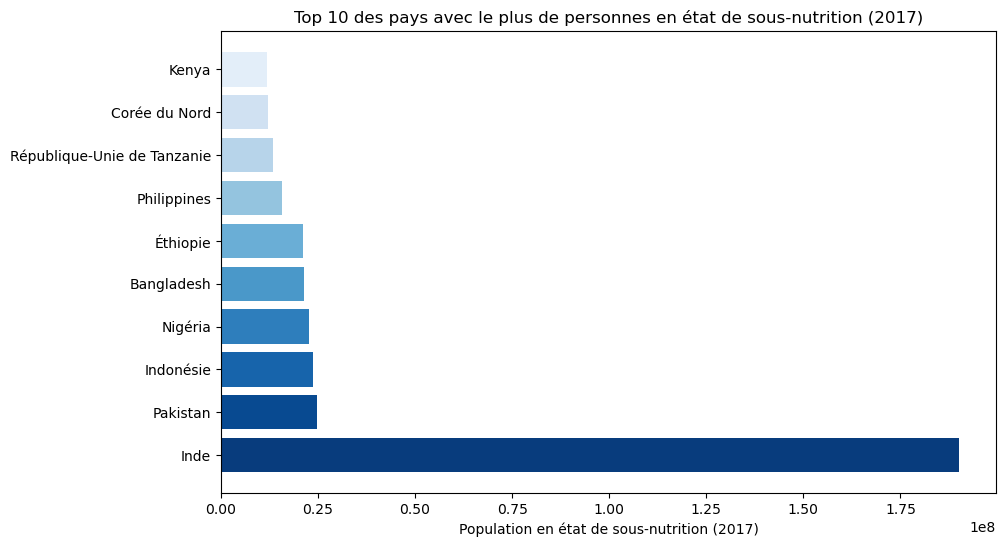

In [75]:
# Création de l'histogramme horizontal avec différentes nuances de bleu
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_sn['Zone'], top10_sn['Population_sous_nutrition'], color=plt.cm.Blues([0.95, 0.9, 0.8, 0.7, 0.6, 0.5,0.4,0.3,0.2,0.1]))

# Ajout des étiquettes d'axe et du titre
plt.xlabel('Population en état de sous-nutrition (2017)')
plt.title('Top 10 des pays avec le plus de personnes en état de sous-nutrition (2017)')

# Affichage du graphique
plt.show()

In [76]:
# Classement des pays comptant le + grand taux de personne en état de sous-nutrition en 2017

pop_nut.sort_values(by='Proportion', ascending=False).head(10)

,Zone,Population,Population_sous_nutrition,Proportion
90,Haïti,10982366.0,5300000.0,48.3
183,Corée du Nord,25429825.0,12000000.0,47.2
131,Madagascar,25570512.0,10500000.0,41.1
125,Libéria,4702226.0,1800000.0,38.3
122,Lesotho,2091534.0,800000.0,38.2
218,Tchad,15016753.0,5700000.0,38.0
188,Rwanda,11980961.0,4200000.0,35.1
148,Mozambique,28649018.0,9400000.0,32.8
221,Timor-Leste,1243258.0,400000.0,32.2
0,Afghanistan,36296113.0,10500000.0,28.9


In [77]:
top10_sn_p = pop_nut.sort_values(by='Proportion', ascending=False).head(10)

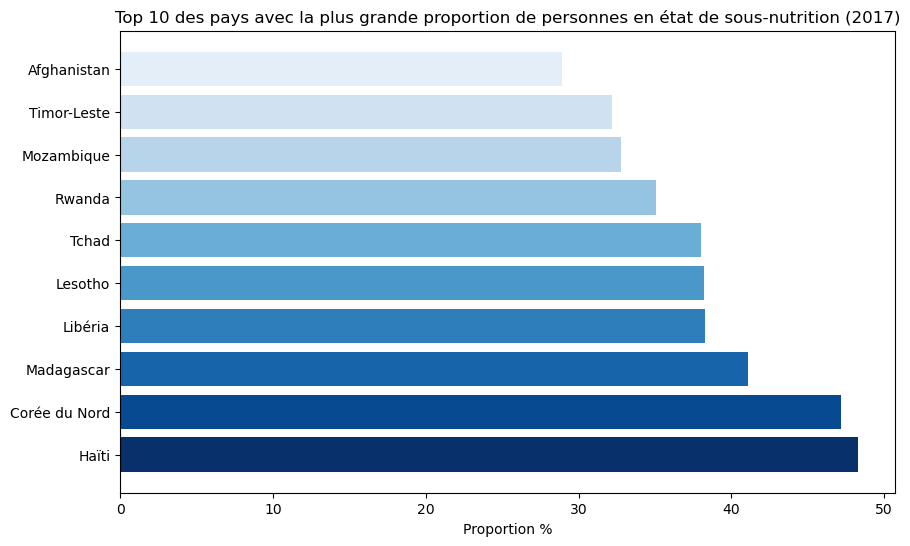

In [78]:
# Création de l'histogramme horizontal avec différentes nuances de bleu
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_sn_p['Zone'], top10_sn_p['Proportion'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5,0.4,0.3,0.2,0.1]))

# Ajout des étiquettes d'axe et du titre
plt.xlabel('Proportion %')
plt.title('Top 10 des pays avec la plus grande proportion de personnes en état de sous-nutrition (2017)')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [80]:
#Combien mange en moyenne un être humain ? Source => FAO

#Un homme a un besoin calorique de 2500 Kcalories/jour contre 2000 Kcalories/jour pour une femme .
#Estimons donc que le besoin pour un etre humain en Kcalories/jouer est de 2250 .

In [81]:
#La disponibilité alimentaire totale inclue des produits aussi bien d'origine animale que végétale.

In [82]:
#suppression des colonnes inutiles

dispo_alim = dispo.drop(columns=[
    "Aliments pour animaux",
    "Origine",
    "Autres Utilisations", 
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Disponibilité intérieure", "Exportations - Quantité", 
    "Importations - Quantité", 
    "Nourriture", 
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock",
    "Produit"])
dispo_alim.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
5,Afghanistan,23.0
6,Afghanistan,0.0
7,Afghanistan,1369.0
8,Afghanistan,0.0
9,Afghanistan,0.0


In [83]:
# aggrégation des disponibilité alimentaire par pays

dispo_alim2 = pd.pivot_table(data=dispo_alim,index=['Zone'],aggfunc="sum")
dispo_alim2.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
Angola,2474.0
Antigua-et-Barbuda,2416.0
Arabie saoudite,3255.0
Argentine,3226.0


In [84]:
pop.head()


,Zone,Population
4,Afghanistan,36296113
10,Afrique du Sud,57009756
16,Albanie,2884169
22,Algérie,41389189
28,Allemagne,82658409


In [85]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
#Affichage du nouveau dataframe

dispo_alim_2017 = pd.merge(pop,dispo_alim2, how='inner', on=['Zone'])
dispo_alim_2017.head(10)


,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113,2087.0
1,Afrique du Sud,57009756,3020.0
2,Albanie,2884169,3188.0
3,Algérie,41389189,3293.0
4,Allemagne,82658409,3503.0
5,Angola,29816766,2474.0
6,Antigua-et-Barbuda,95426,2416.0
7,Arabie saoudite,33101178,3255.0
8,Argentine,43937140,3226.0
9,Arménie,2944791,2924.0


In [86]:
# calcul des dispo alimentaire totales par pays par jour

dispo_kcal_pays = round((dispo_alim_2017['Population'] * dispo_alim_2017['Disponibilité alimentaire (Kcal/personne/jour)']), 1)
dispo_alim_2017['dispo_kcal_pays'] = dispo_kcal_pays
dispo_alim_2017.head(10)

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_pays
0,Afghanistan,36296113,2087.0,7.574999e+10
1,Afrique du Sud,57009756,3020.0,1.721695e+11
2,Albanie,2884169,3188.0,9.194731e+09
3,Algérie,41389189,3293.0,1.362946e+11
4,Allemagne,82658409,3503.0,2.895524e+11
5,Angola,29816766,2474.0,7.376668e+10
6,Antigua-et-Barbuda,95426,2416.0,2.305492e+08
7,Arabie saoudite,33101178,3255.0,1.077443e+11
8,Argentine,43937140,3226.0,1.417412e+11
9,Arménie,2944791,2924.0,8.610569e+09


In [87]:
dispo_alim_2017.dtypes

Zone                                              string[python]
Population                                                 int64
Disponibilité alimentaire (Kcal/personne/jour)           float64
dispo_kcal_pays                                          float64
dtype: object

In [88]:
#Calcul du nombre d'humains pouvant être nourris sur la base de 2250 Kcals/jour par personne

pop_totale = dispo_alim_2017["Population"].sum()
kcal_total = dispo_alim_2017["dispo_kcal_pays"].sum()
kcal_mini = 2250
pers_nourrie = round((kcal_total/kcal_mini))

print(pers_nourrie,"individus pourraient être nourries sur une base de 2250 Kcal/J si l'alimentation disponible était") 
print("équitablement répartie dans le monde.\n")

# calcul du % de la population totale qui pourrait être nourrie par la disponibilité totale
proportion_personne_nourrie = round((pers_nourrie / pop_totale) * 100,1)

print("Cela représente", proportion_personne_nourrie,"% de la population actuelle")

9494101510 individus pourraient être nourries sur une base de 2250 Kcal/J si l'alimentation disponible était
équitablement répartie dans le monde.

Cela représente 127.4 % de la population actuelle


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [90]:
#filtre sur les disponibilités végétales

dispo_alim_veg = dispo_alim.loc[dispo['Origine'] == 'vegetale']
dispo_alim_veg.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
6,Afghanistan,0.0


In [91]:
# agrégation par pays

dispo_alim3 = pd.pivot_table(data=dispo_alim_veg,index=['Zone'],aggfunc="sum")
dispo_alim3.head(10)


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
Angola,2221.0
Antigua-et-Barbuda,1635.0
Arabie saoudite,2736.0
Argentine,2239.0


In [92]:
#Transfert des données avec les végétaux dans un nouveau dataframe

dispo_veg = pd.merge(pop,dispo_alim3, how='inner', on=['Zone'])

dispo_veg.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113,1871.0
1,Afrique du Sud,57009756,2533.0
2,Albanie,2884169,2203.0
3,Algérie,41389189,2915.0
4,Allemagne,82658409,2461.0


In [93]:
#Calcul du nombre de kcal disponible pour les végétaux

dispo_veg["Dispo_Kcal_veg"] = round ((dispo_veg ["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_veg["Population"]),1)
dispo_veg.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Dispo_Kcal_veg
0,Afghanistan,36296113,1871.0,6.791003e+10
1,Afrique du Sud,57009756,2533.0,1.444057e+11
2,Albanie,2884169,2203.0,6.353824e+09
3,Algérie,41389189,2915.0,1.206495e+11
4,Allemagne,82658409,2461.0,2.034223e+11


In [94]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

Pop_totale_veg = dispo_veg["Population"].sum()
Dispo_totale_veg = dispo_veg["Dispo_Kcal_veg"].sum()
perso_nourrie_veg = round((Dispo_totale_veg/kcal_mini))

print(perso_nourrie_veg ,"d'individus en 2017 pourraient etre nourrie si l'alimentation vegetale etait équitablement redistribué dans le monde.\n")

# calcul du % de la population totale qui pourrait être nourrie par la disponibilité végétale

proportion_nourrie_veg = round ((perso_nourrie_veg/Pop_totale_veg)*100,1)

print("cela represente",proportion_nourrie_veg ,"% de la population mondiale en 2017 ")


7828451691 d'individus en 2017 pourraient etre nourrie si l'alimentation vegetale etait équitablement redistribué dans le monde.

cela represente 105.1 % de la population mondiale en 2017 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [96]:
# Epuration de la table

dispo_int_total = dispo.drop(columns = [ 
    "Produit",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité alimentaire en quantité (kg/personne/an)", 
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)", 
    "Origine"])
dispo_int_total.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,0.0,0.0,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,0.0,0.0,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,0.0,0.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,0.0,0.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# agrégation par pays 

dispo_int_total = pd.pivot_table(data=dispo_int_total,index=['Zone'],aggfunc="sum")
dispo_int_total.head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,
Afghanistan,7.680000e+08,4.150000e+08,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-3.680000e+08
Afrique du Sud,5.309000e+09,8.760000e+08,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2.153000e+09
Albanie,6.600000e+08,1.740000e+08,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
Algérie,4.352000e+09,1.707000e+09,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-4.790000e+08
Allemagne,3.020900e+10,7.711000e+09,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08
Angola,9.259000e+09,4.510000e+08,3.202900e+10,2.300000e+07,4.416000e+09,1.505900e+10,4.799000e+09,2.885700e+10,3.370000e+08,2.121000e+09,-1.228000e+09
Antigua-et-Barbuda,0.000000e+00,2.000000e+07,7.900000e+07,0.000000e+00,6.300000e+07,5.800000e+07,0.000000e+00,2.000000e+07,0.000000e+00,0.000000e+00,-7.000000e+06
Arabie saoudite,1.184100e+10,1.590000e+08,3.127400e+10,4.707000e+09,2.772600e+10,1.795600e+10,1.040000e+09,8.878000e+09,9.700000e+07,6.010000e+08,-6.280000e+08
Argentine,7.890000e+09,4.194000e+09,1.143690e+11,5.233300e+10,1.212000e+09,3.253100e+10,3.522000e+09,1.761240e+11,2.416000e+09,6.398300e+10,-1.063200e+10


In [98]:
#Calcul de la disponibilité totale

Dispo_int_mondiale = dispo_int_total["Disponibilité intérieure"].sum()
Autres_Utilisations_totale = dispo_int_total["Autres Utilisations"].sum()
Nourriture_totale  = dispo_int_total["Nourriture"].sum()
Semences_totale = dispo_int_total["Semences"].sum()
Traitement_total = dispo_int_total["Traitement"].sum()
Variation_de_stock_total = dispo_int_total["Variation de stock"].sum()
Pertes_totale = dispo_int_total["Pertes"].sum()
Aliments_animaux_totale = dispo_int_total["Aliments pour animaux"].sum()
Importations_totale = dispo_int_total["Importations - Quantité"].sum()
Exportations_totale = dispo_int_total["Exportations - Quantité"].sum()
Production_totale = dispo_int_total["Production"].sum()
proportion_pertes = round ((Pertes_totale/Dispo_int_mondiale)*100,1)
proportion_nourriture_humaine = round ((Nourriture_totale/Dispo_int_mondiale)*100,1)
proportion_nourriture_animale = round ((Aliments_animaux_totale/Dispo_int_mondiale)*100,1)

print ("On denombre en 2017 :",Dispo_int_mondiale,"kg de disponibilité mondiale,")
print ("                      ",Pertes_totale ,"kg de pertes mondiale,")                              
print ("                     ",Nourriture_totale,"kg de nourriture humaine,")
print ("                     ",Aliments_animaux_totale,"kg de nourriture dedié à l'alimentation des animaux.")
print ("                    ",Production_totale,"kg de production mondial de nourriture")
print ("")
print ("Les pertes representes",proportion_pertes,"% de la disponibilité mondiale.\n")
print ("La nourriture humaine represente",proportion_nourriture_humaine,"% de la disponibilité mondiale.\n")
print("La nourriture animale represente",proportion_nourriture_animale,"% de la disponibilité mondiale.")


On denombre en 2017 : 9848994000000.0 kg de disponibilité mondiale,
                       453698000000.0 kg de pertes mondiale,
                      4876258000000.0 kg de nourriture humaine,
                      1304245000000.0 kg de nourriture dedié à l'alimentation des animaux.
                     10009680000000.0 kg de production mondial de nourriture

Les pertes representes 4.6 % de la disponibilité mondiale.

La nourriture humaine represente 49.5 % de la disponibilité mondiale.

La nourriture animale represente 13.2 % de la disponibilité mondiale.


In [99]:
# verifions l'equation suivante Production + Importations - Exportations + Variation de stock = Disponibilité intérieure =Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

x = Dispo_int_mondiale
y = Production_totale + Importations_totale - Exportations_totale + Variation_de_stock_total
z = Semences_totale + Nourriture_totale + Aliments_animaux_totale + Traitement_total + Pertes_totale + Autres_Utilisations_totale

(x,y,z)

(9848994000000.0, 9849173000000.0, 9858592000000.0)

In [100]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,Autres Utilisations,Traitement,Semences. 

boucle = ["Aliments pour animaux", "Pertes", "Nourriture","Autres Utilisations","Traitement","Semences"]

for colonne in boucle:
    somme_colonne = dispo_int_total[colonne].sum()
    proportion_colonne = round((somme_colonne / Dispo_int_mondiale) * 100, 1)
    
    print(f"La somme de la colonne '{colonne}' est de {somme_colonne} kg.")
    print(f"Cela représente {proportion_colonne}% de la disponibilité mondiale.\n")

La somme de la colonne 'Aliments pour animaux' est de 1304245000000.0 kg.
Cela représente 13.2% de la disponibilité mondiale.

La somme de la colonne 'Pertes' est de 453698000000.0 kg.
Cela représente 4.6% de la disponibilité mondiale.

La somme de la colonne 'Nourriture' est de 4876258000000.0 kg.
Cela représente 49.5% de la disponibilité mondiale.

La somme de la colonne 'Autres Utilisations' est de 865023000000.0 kg.
Cela représente 8.8% de la disponibilité mondiale.

La somme de la colonne 'Traitement' est de 2204687000000.0 kg.
Cela représente 22.4% de la disponibilité mondiale.

La somme de la colonne 'Semences' est de 154681000000.0 kg.
Cela représente 1.6% de la disponibilité mondiale.



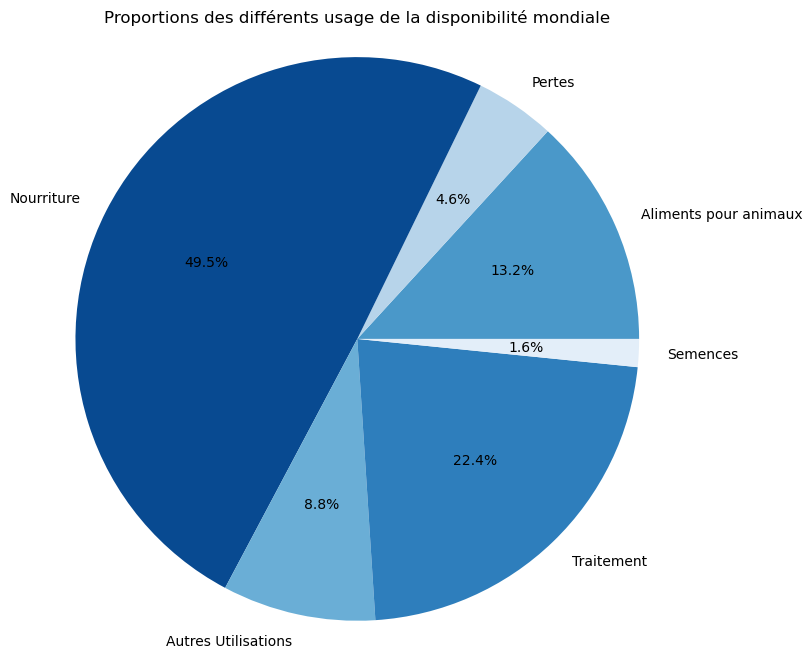

In [101]:
# Données obtenues
categories = ["Aliments pour animaux", "Pertes", "Nourriture", "Autres Utilisations", "Traitement", "Semences"]
pourcentages = [13.2, 4.6, 49.5, 8.8, 22.4, 1.6]

# Créer le camembert
plt.figure(figsize=(8, 8))
plt.pie(pourcentages, labels=categories, autopct='%1.1f%%', startangle=0, colors=plt.cm.Blues([0.6, 0.3, 0.9, 0.5, 0.7, 0.1]))
plt.title('Proportions des différents usage de la disponibilité mondiale')
plt.axis('equal')

# Afficher le camembert
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [103]:
#Création d'une liste avec toutes les variables
Cereales = dispo.copy()

In [104]:
#Création d'un dataframe avec les informations uniquement pour ces céréales (selon le FAO)
Cereales = Cereales.loc[(Cereales["Produit"] == "Millet") | (Cereales["Produit"] == "Orge") | (Cereales["Produit"] == "Seigle")| (Cereales["Produit"] == "Céréales, Autres")| (Cereales["Produit"] == "Blé")| (Cereales["Produit"] == "Soja")| (Cereales["Produit"] == "Maïs")| (Cereales["Produit"] == "Avoine") | (Cereales["Produit"] == "Riz (Eq Blanchi)")]
Cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [105]:
#aggregation par pays

Cereales2 = pd.pivot_table(data=Cereales,index=['Zone'],aggfunc="sum")
Cereales2.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,5.600000e+08,0.000000e+00,1560.0,179.87,5.52,41.04,7.303000e+09,0.000000e+00,1.303000e+09,5.494000e+09,vegetalevegetalevegetalevegetalevegetalevegetale,8.830000e+08,6.350000e+09,"BléCéréales, AutresMaïsMilletOrgeRiz (Eq Blanchi)",3.630000e+08,0.000000e+00,-3.500000e+08
Afrique du Sud,4.803000e+09,0.000000e+00,1539.0,179.94,10.74,42.09,1.603300e+10,3.734000e+09,3.096000e+09,9.499000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,5.110000e+08,1.479300e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",9.400000e+07,1.126000e+09,1.879000e+09
Albanie,4.110000e+08,1.340000e+08,1144.0,149.27,6.08,35.49,1.145000e+09,4.000000e+06,4.680000e+08,4.740000e+08,vegetalevegetalevegetalevegetalevegetalevegeta...,9.100000e+07,7.030000e+08,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",2.200000e+07,1.200000e+07,-2.200000e+07
Algérie,4.337000e+09,8.200000e+08,1677.0,217.60,6.79,49.31,1.501000e+10,2.000000e+06,1.027800e+10,8.532000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,1.024000e+09,4.912000e+09,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",2.530000e+08,4.200000e+07,-1.800000e+08
Allemagne,2.666100e+10,1.013000e+09,880.0,111.99,3.90,27.28,4.557000e+10,1.674100e+10,1.467800e+10,9.263000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,1.233000e+09,4.776700e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.027000e+09,6.372000e+09,-1.340000e+08


In [106]:
#Affichage de la proportion d'alimentation animale
#Affichage de la proportion d'alimentation humaine
#Affichage de la proportion des pertes
#Affichage de la proportion des autres utilisations

production_cereales_mondiale = Cereales2['Production'].sum()
utilisation_animale = Cereales2['Aliments pour animaux'].sum()
autres_utilisations = Cereales2['Autres Utilisations'].sum()
nourriture = Cereales2['Nourriture'].sum()
Pertes_cerealiere = Cereales2['Pertes'].sum()
Exportation_cerealiere = Cereales2['Exportations - Quantité'].sum()
Traitement_cerealier = Cereales2['Traitement'].sum()
Semence_cerealiere = Cereales2['Semences'].sum()

proportion = round((utilisation_animale/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour nourrir les animaux :", proportion,"%.")

proportion_autres_utilisations = round((autres_utilisations/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour d'autres utilisations:",proportion_autres_utilisations,"%.")

proportion_nourriture = round((nourriture/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour nourrir les Hommes:",proportion_nourriture,"%.")

proportion_Pertes = round((Pertes_cerealiere/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour les Pertes:",proportion_Pertes,"%.")

proportion_Exportations = round((Exportation_cerealiere/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour les exportations:",proportion_Exportations,"%.")

proportion_Traitement_cerealier = round((Traitement_cerealier/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour les Traitements:",proportion_Traitement_cerealier,"%.")

proportion_Semence_cerealiere = round((Semence_cerealiere/production_cereales_mondiale) * 100,1)
print("Proportion utilisée pour les Semences:",proportion_Semence_cerealiere,"%.")

Proportion utilisée pour nourrir les animaux : 31.6 %.
Proportion utilisée pour d'autres utilisations: 8.5 %.
Proportion utilisée pour nourrir les Hommes: 37.1 %.
Proportion utilisée pour les Pertes: 4.0 %.
Proportion utilisée pour les exportations: 19.2 %.
Proportion utilisée pour les Traitements: 11.6 %.
Proportion utilisée pour les Semences: 2.7 %.


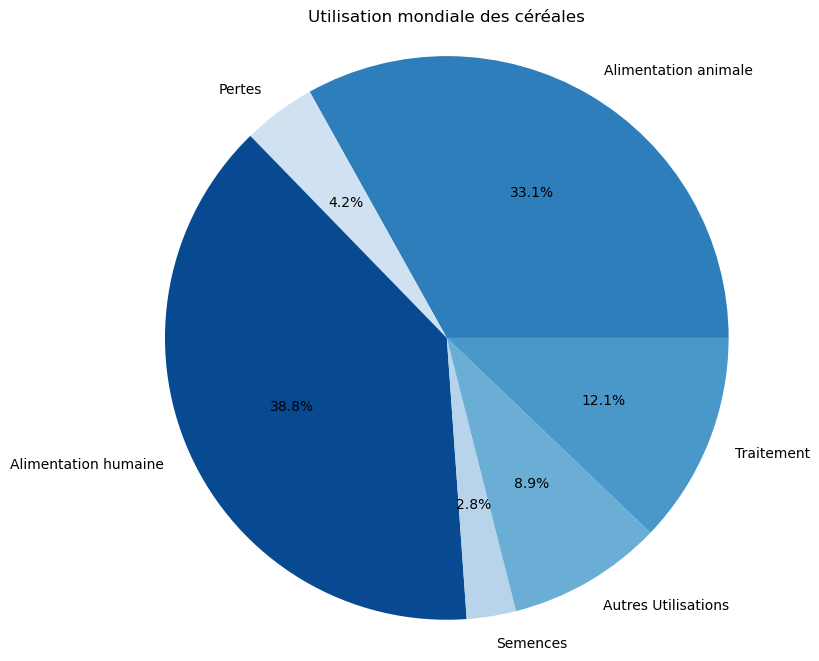

In [107]:
# Données
labels = ['Alimentation animale',"Pertes", 'Alimentation humaine',"Semences","Autres Utilisations","Traitement"]
sizes = [proportion,proportion_Pertes, proportion_nourriture,proportion_Semence_cerealiere,proportion_autres_utilisations, proportion_Traitement_cerealier]
colors=plt.cm.Blues([0.7, 0.2, 0.9, 0.3, 0.5, 0.6])  

# Création du camembert
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors)

# Aspect d'un cercle pour que le camembert soit circulaire
ax1.axis('equal')  

# Ajout d'un titre
plt.title('Utilisation mondiale des céréales')

# Affichage du camembert
plt.show()

In [108]:
# Classement des 10 plus gros producteurs toutes céréales confondues

Cereales2.nlargest(10, ['Production'])

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Etats-Unis,1.399850e+11,1.371810e+11,794.0,104.93,3.56,23.52,3.913160e+11,1.029710e+11,1.452800e+10,3.358600e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,8.130000e+08,5.151930e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",5.716000e+09,7.404400e+10,-3.543400e+10
"Chine, continentale",2.006720e+11,4.018000e+10,1453.0,153.21,7.05,36.85,5.546100e+11,2.317000e+09,7.708900e+10,2.122550e+11,vegetalevegetalevegetalevegetalevegetalevegeta...,2.062500e+10,4.941320e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.186600e+10,6.901000e+10,-1.429400e+10
Inde,1.136600e+10,4.500000e+07,1333.0,145.27,5.53,31.80,2.225740e+11,2.465900e+10,1.150000e+08,1.818890e+11,vegetalevegetalevegetalevegetalevegetalevegeta...,1.223500e+10,2.475940e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",7.234000e+09,9.870000e+09,-4.770000e+08
Brésil,4.186800e+10,1.000000e+06,987.0,119.86,3.06,24.99,1.154560e+11,7.171400e+10,1.103400e+10,2.401500e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,9.733000e+09,1.767840e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.981000e+09,3.785900e+10,-6.490000e+08
Argentine,6.231000e+09,1.285000e+09,1060.0,123.43,2.99,27.38,5.140900e+10,3.534300e+10,2.700000e+07,5.116000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,1.686000e+09,9.706800e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",2.205000e+09,3.488500e+10,-1.034400e+10
Russie,3.126800e+10,1.900000e+07,1153.0,148.04,3.93,33.83,7.079000e+10,1.960900e+10,3.449000e+09,2.114600e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,1.001000e+09,9.153700e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.135100e+10,6.007000e+09,-4.584000e+09
Canada,2.437100e+10,9.500000e+08,917.0,120.31,3.69,27.23,3.507400e+10,3.049400e+10,3.015000e+09,4.233000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,5.240000e+08,7.176500e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.547000e+09,3.786000e+09,-9.209000e+09
France,1.899400e+10,3.437000e+09,960.0,127.29,4.67,29.35,3.594800e+10,3.683900e+10,4.253000e+09,8.185000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,5.750000e+08,6.730000e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.171000e+09,3.589000e+09,1.231000e+09
Indonésie,8.043000e+09,1.195600e+10,1762.0,196.60,7.29,36.41,7.709500e+10,3.430000e+08,1.274200e+10,4.912400e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,5.207000e+09,6.683600e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",6.320000e+08,2.175000e+09,-2.141000e+09


In [109]:
top10_prod = Cereales2.nlargest(10, ['Production'])

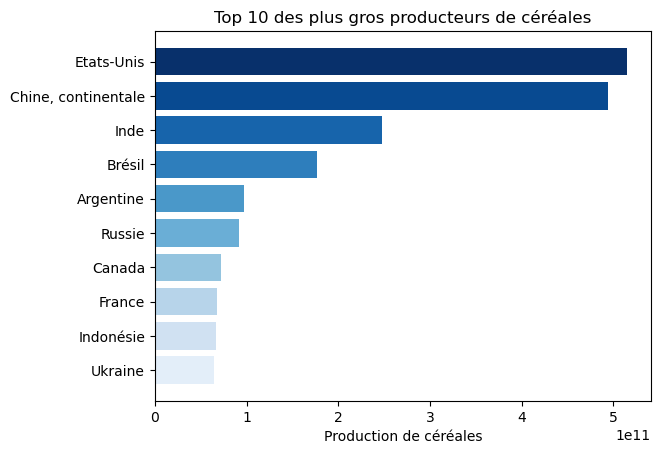

In [110]:
# Création de l'histogramme horizontal
plt.barh(top10_prod.index, top10_prod['Production'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.xlabel('Production de céréales')
plt.title('Top 10 des plus gros producteurs de céréales')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher le plus gros producteur en haut
plt.show()

In [111]:
# Classement des 10 plus gros exportateurs toutes céréales confondues

Cereales2.nlargest(10, ['Exportations - Quantité'])

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Etats-Unis,1.399850e+11,1.371810e+11,794.0,104.93,3.56,23.52,3.913160e+11,1.029710e+11,1.452800e+10,3.358600e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,8.130000e+08,5.151930e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",5.716000e+09,7.404400e+10,-3.543400e+10
Brésil,4.186800e+10,1.000000e+06,987.0,119.86,3.06,24.99,1.154560e+11,7.171400e+10,1.103400e+10,2.401500e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,9.733000e+09,1.767840e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.981000e+09,3.785900e+10,-6.490000e+08
France,1.899400e+10,3.437000e+09,960.0,127.29,4.67,29.35,3.594800e+10,3.683900e+10,4.253000e+09,8.185000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,5.750000e+08,6.730000e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.171000e+09,3.589000e+09,1.231000e+09
Argentine,6.231000e+09,1.285000e+09,1060.0,123.43,2.99,27.38,5.140900e+10,3.534300e+10,2.700000e+07,5.116000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,1.686000e+09,9.706800e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",2.205000e+09,3.488500e+10,-1.034400e+10
Canada,2.437100e+10,9.500000e+08,917.0,120.31,3.69,27.23,3.507400e+10,3.049400e+10,3.015000e+09,4.233000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,5.240000e+08,7.176500e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.547000e+09,3.786000e+09,-9.209000e+09
Ukraine,2.016800e+10,3.600000e+07,1060.0,138.43,3.85,30.81,3.334400e+10,2.910200e+10,2.770000e+08,6.262000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,1.968000e+09,6.505800e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",2.758000e+09,2.153000e+09,-2.890000e+09
Australie,6.556000e+09,1.046000e+09,742.0,87.90,2.85,21.79,1.126500e+10,2.516800e+10,5.340000e+08,2.052000e+09,vegetalevegetalevegetalevegetalevegetalevegeta...,3.110000e+08,3.307400e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",8.520000e+08,4.470000e+08,2.827000e+09
Inde,1.136600e+10,4.500000e+07,1333.0,145.27,5.53,31.80,2.225740e+11,2.465900e+10,1.150000e+08,1.818890e+11,vegetalevegetalevegetalevegetalevegetalevegeta...,1.223500e+10,2.475940e+11,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",7.234000e+09,9.870000e+09,-4.770000e+08
Russie,3.126800e+10,1.900000e+07,1153.0,148.04,3.93,33.83,7.079000e+10,1.960900e+10,3.449000e+09,2.114600e+10,vegetalevegetalevegetalevegetalevegetalevegeta...,1.001000e+09,9.153700e+10,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1.135100e+10,6.007000e+09,-4.584000e+09


In [112]:
top10_expor = Cereales2.nlargest(10, ['Exportations - Quantité'])

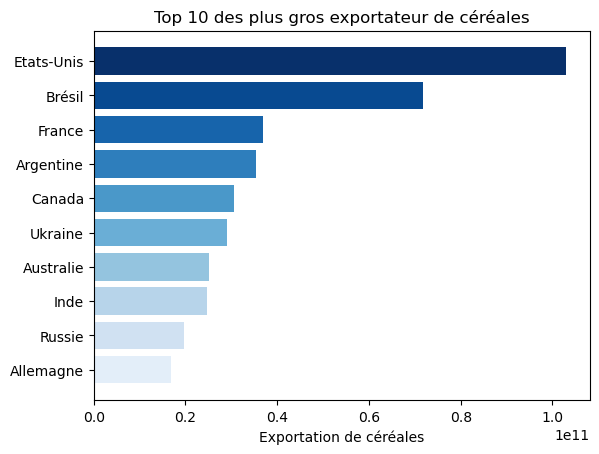

In [113]:
# Création de l'histogramme 
plt.barh(top10_expor.index, top10_expor['Exportations - Quantité'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.xlabel('Exportation de céréales')
plt.title('Top 10 des plus gros exportateur de céréales')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher le plus gros producteur en haut
plt.show()

In [114]:
Cereales2.columns

Index(['Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Origine', 'Pertes',
       'Production', 'Produit', 'Semences', 'Traitement',
       'Variation de stock'],
      dtype='object')

In [115]:
# Calcul de l'utilisation de la disponibilité intérieure céréalière par pays

Cereales2['% utilisation pour animaux'] = round((Cereales2['Aliments pour animaux']/ Cereales2['Disponibilité intérieure']) * 100,2)


Cereales2['% utilisation nourriture humaine'] = round((Cereales2['Nourriture']/ Cereales2['Disponibilité intérieure']) * 100,2)


Cereales3 = Cereales2[['% utilisation nourriture humaine','% utilisation pour animaux']]

Cereales3

,% utilisation nourriture humaine,% utilisation pour animaux
Zone,,
Afghanistan,75.23,7.67
Afrique du Sud,59.25,29.96
Albanie,41.40,35.90
Algérie,56.84,28.89
Allemagne,20.33,58.51
...,...,...
Égypte,52.72,31.13
Émirats arabes unis,45.65,30.68
Équateur,43.26,23.94


In [116]:
# Classement des 10 pays avec la proportion d'utilisation cerealiere pour la nourriture humaine la plus élevé.

Cereales3.nlargest(10, ['% utilisation nourriture humaine'])

,% utilisation nourriture humaine,% utilisation pour animaux
Zone,,
Sao Tomé-et-Principe,100.00,0.00
Honk Kong,95.02,0.24
Mauritanie,94.47,0.32
Djibouti,94.08,0.00
Timor-Leste,93.47,4.02
Kiribati,92.31,0.00
Haïti,92.07,2.17
Lesotho,91.82,0.00
Kenya,91.52,2.01


In [117]:
top10_nh = Cereales3.nlargest(10, ['% utilisation nourriture humaine'])

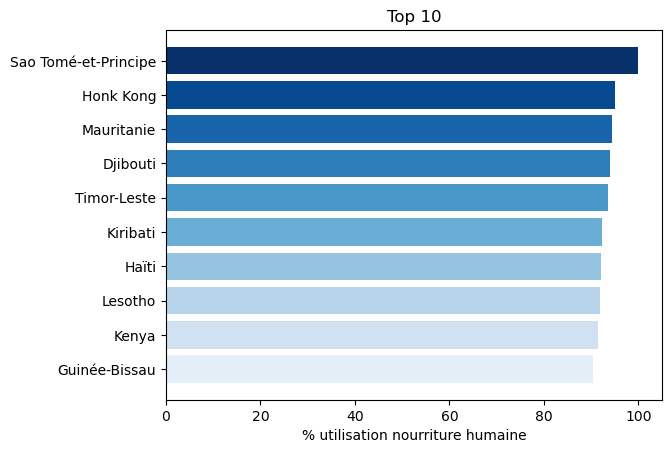

In [118]:
# Création de l'histogramme horizontal
plt.barh(top10_nh.index, top10_nh['% utilisation nourriture humaine'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.xlabel('% utilisation nourriture humaine')
plt.title('Top 10')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher le plus gros producteur en haut
plt.show()

In [119]:
# Classement des 10 pays avec la proportion d'utilisation cerealiere pour la nourriture pour animaux la plus élevé.

Cereales3.nlargest(10, ['% utilisation pour animaux'])

,% utilisation nourriture humaine,% utilisation pour animaux
Zone,,
Danemark,9.12,82.38
Irlande,15.56,76.41
Canada,12.07,69.48
Arabie saoudite,25.44,69.03
Bélarus,13.44,68.99
Chypre,23.56,68.89
Croatie,17.86,68.40
Serbie,17.42,67.62
Espagne,13.57,67.46


In [120]:
top10_ua = Cereales3.nlargest(10, ['% utilisation pour animaux'])

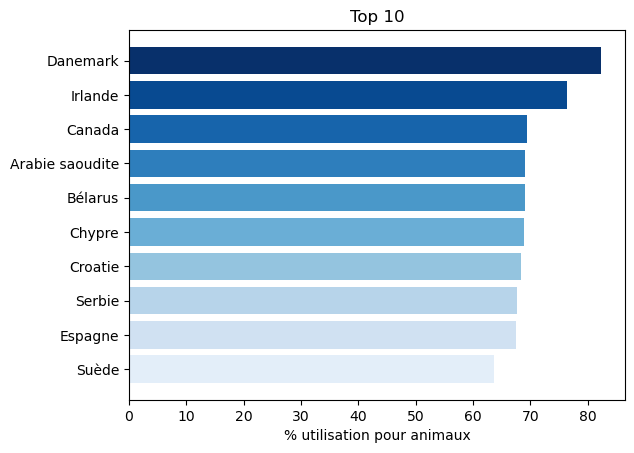

In [121]:
# Création de l'histogramme horizontal
plt.barh(top10_ua.index,top10_ua['% utilisation pour animaux'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.xlabel('% utilisation pour animaux')
plt.title('Top 10')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher le plus gros producteur en haut
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [123]:
#Création de la colonne proportion par pays


In [124]:
#affichage après trie des 10 pires pays


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [126]:
#calcul du total de l'aide alimentaire par pays

pays_benef = aide.groupby('Zone')[['Valeur']].sum()
pays_benef.head()

,Valeur
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000


In [127]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_benef.sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Zone,
Syrie,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Congo,311452000
Somalie,292678000


In [128]:
top10_aideA = pays_benef.sort_values(by = 'Valeur', ascending = False).head(10)

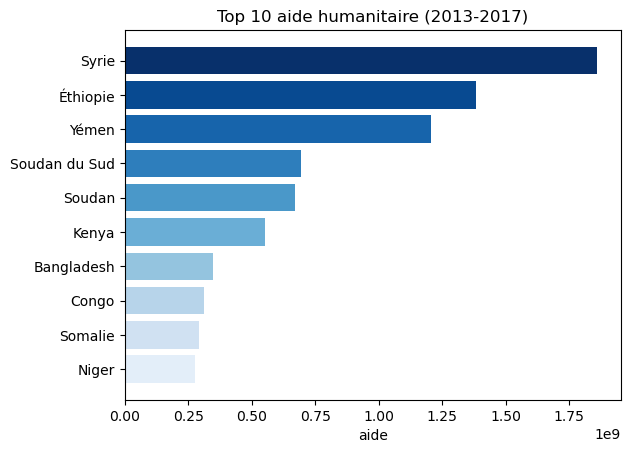

In [129]:
# Création de l'histogramme horizontal en utilisant l'index comme positions
plt.barh(top10_aideA.index,top10_aideA['Valeur'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
plt.xlabel('aide')
plt.title('Top 10 aide humanitaire (2013-2017)')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher le plus gros producteur en haut
plt.show()

In [130]:
# total de l'aide fournie chaque année en kilos

aide.groupby('Année')[['Valeur']].sum()

,Valeur
Année,
2013,4165674000
2014,3939152000
2015,2187507000
2016,743568000


In [131]:
aide_totale = aide.groupby('Année')[['Valeur']].sum()
aide_totale.index


Index([2013, 2014, 2015, 2016], dtype='int64', name='Année')

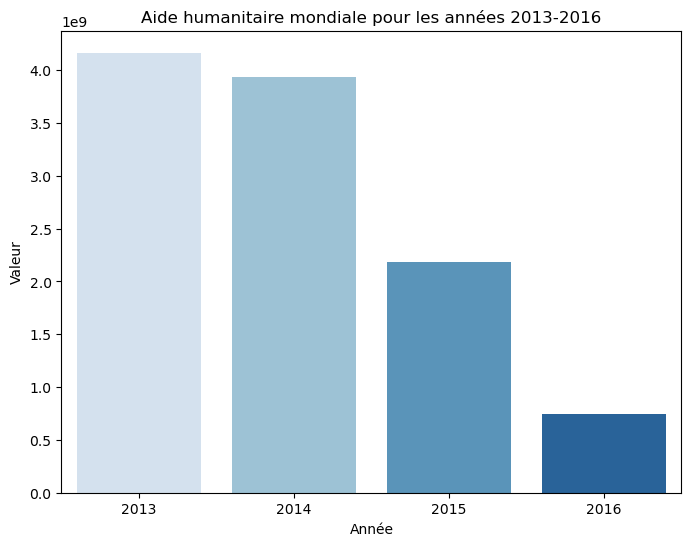

In [132]:
# Liste des années spécifiées
annees = [2013, 2014, 2015, 2016]

# Filtrage du DataFrame pour inclure uniquement les années spécifiées
aide_annees_specifiees = aide_totale[aide_totale.index.isin(annees)]

# Création de l'histogramme avec Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=aide_annees_specifiees.index, y='Valeur', data=aide_annees_specifiees, palette="Blues")

# Ajout de l'étiquette de l'axe des x
plt.xlabel('Année')

# Ajout de l'étiquette de l'axe des y
plt.ylabel('Valeur')

# Ajout du titre du graphique
plt.title('Aide humanitaire mondiale pour les années 2013-2016')

# Affichage du graphique
plt.show()

In [133]:
# On remarque que l'aide alimentaire baisse au fil des années 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [135]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
pays_benef2 = aide.groupby(["Zone","Année"])["Valeur"].sum()

pays_benef2.head(10)

Zone         Année
Afghanistan  2013     128238000
             2014      57214000
Algérie      2013      35234000
             2014      18980000
             2015      17424000
             2016       9476000
Angola       2013       5000000
             2014         14000
Bangladesh   2013     131018000
             2014     194628000
Name: Valeur, dtype: int64

In [136]:
pays_benef2_df = pays_benef2.reset_index()
pays_benef2_df.columns = ["Zone", "Année", "aide"]

In [137]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
TOP5 = pays_benef2_df.loc[(pays_benef2_df['Zone'] == "Syrie") | (pays_benef2_df['Zone'] == "Éthiopie") | (pays_benef2_df['Zone'] == "Yémen")| (pays_benef2_df['Zone'] == "Soudan du Sud")| (pays_benef2_df['Zone'] == "Soudan")]


In [138]:
#On filtre sur le dataframe avec notre liste
TOP5

,Zone,Année,aide
182,Soudan,2013,330230000
183,Soudan,2014,321904000
184,Soudan,2015,17650000
185,Soudan du Sud,2013,196330000
186,Soudan du Sud,2014,450610000
187,Soudan du Sud,2015,48308000
194,Syrie,2013,563566000
195,Syrie,2014,651870000
196,Syrie,2015,524949000
197,Syrie,2016,118558000


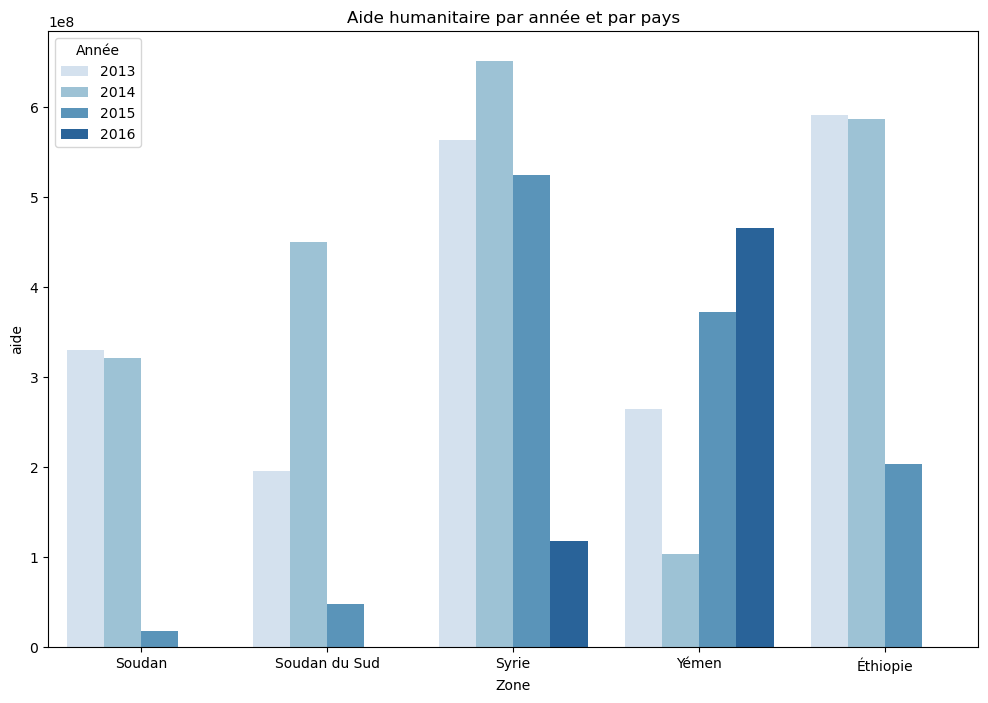

In [139]:
# Création de l'histogramme groupé avec seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x="Zone", y="aide", hue="Année", data=TOP5, palette="Blues")


# Ajout de l'étiquette de l'axe des y
plt.ylabel('aide')

# Ajout du titre du graphique
plt.title('Aide humanitaire par année et par pays')

# Affichage du graphique
plt.show()

In [140]:
# Affichage des pays avec l'aide alimentaire par année
pays_benef2_df.head(10)

,Zone,Année,aide
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
5,Algérie,2016,9476000
6,Angola,2013,5000000
7,Angola,2014,14000
8,Bangladesh,2013,131018000
9,Bangladesh,2014,194628000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [142]:
#Calcul de la disponibilité en kcal par personne par jour par pays


In [143]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_alim2.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
Corée du Nord,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [144]:
Top10_dispo1 = dispo_alim2.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)


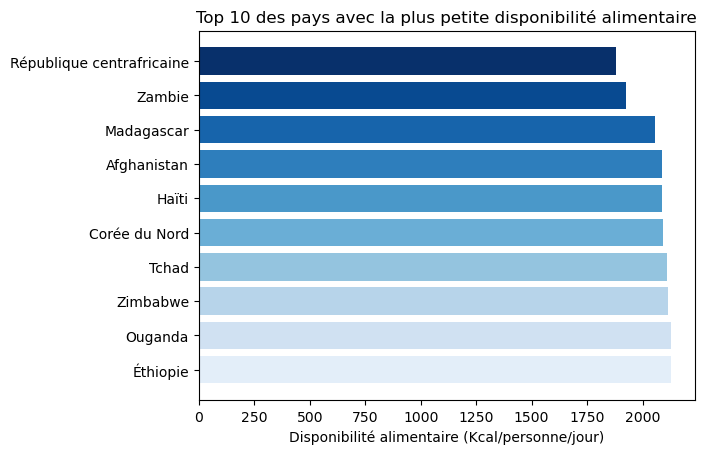

In [145]:
# Création de l'histogramme horizontal en utilisant l'index comme positions
plt.barh(Top10_dispo1.index, Top10_dispo1['Disponibilité alimentaire (Kcal/personne/jour)'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))

# Ajout de l'étiquette de l'axe des x
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')


# Ajout du titre du graphique
plt.title('Top 10 des pays avec la plus petite disponibilité alimentaire')

# Inversion de l'axe y pour afficher le plus gros producteur en haut
plt.gca().invert_yaxis()

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [147]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_alim2.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
Etats-Unis,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [148]:
Top10_dispo2 = dispo_alim2.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

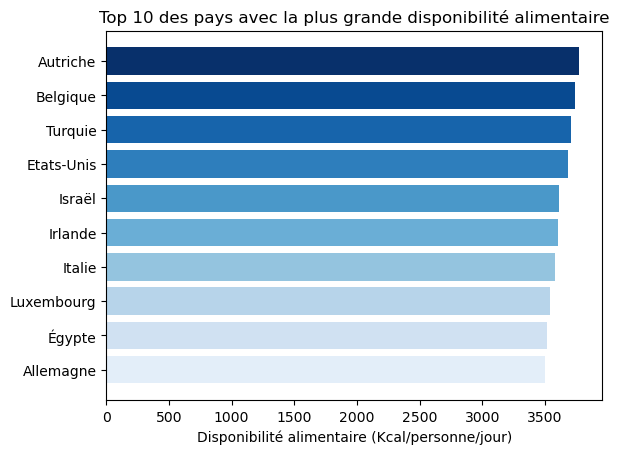

In [149]:
# Création de l'histogramme horizontal en utilisant l'index comme positions
plt.barh(Top10_dispo2.index, Top10_dispo2['Disponibilité alimentaire (Kcal/personne/jour)'], color=plt.cm.Blues([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))

# Ajout de l'étiquette de l'axe des x
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')


# Ajout du titre du graphique
plt.title('Top 10 des pays avec la plus grande disponibilité alimentaire')

# Inversion de l'axe y pour afficher le plus gros producteur en haut
plt.gca().invert_yaxis()

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [151]:
# Création d'un DataFrame avec uniquement la Thaïlande et le Manioc
dispo_manioc_thai = dispo.loc[(dispo["Zone"] == "Thaïlande") & (dispo["Produit"] == "Manioc")]

# Réinitialisation de l'index pour rendre le résultat plus lisible
dispo_manioc_thai = dispo_manioc_thai.reset_index(drop=True)


# Affichage du dataframe
dispo_manioc_thai


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [152]:
#Calcul de la sous nutrition en Thaïlande
pop_nut.loc[(pop_nut["Zone"] == "Thaïlande")]

,Zone,Population,Population_sous_nutrition,Proportion
220,Thaïlande,69209810.0,6200000.0,9.0


In [153]:

pop_nut.dtypes

Zone                         string[python]
Population                          float64
Population_sous_nutrition           float64
Proportion                          float64
dtype: object

In [154]:
#Calcul de la disponibilité en Thaïlande

dispo_alim2.loc[(dispo_alim2.index == "Thaïlande")]

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Thaïlande,2785.0


In [155]:
# On calcule la proportion exportée en fonction de la production

exportation_manioc_thai = round((dispo_manioc_thai['Exportations - Quantité'] / dispo_manioc_thai['Production']) * 100, 1 )



print("La Thaïlande exporte {}% de sa production de manioc".format(exportation_manioc_thai.iloc[0]))


La Thaïlande exporte 83.4% de sa production de manioc


In [156]:
colonnes_a_afficher = ["Aliments pour animaux", "Pertes", "Nourriture", "Importations - Quantité", "Exportations - Quantité", "Autres Utilisations"]

for nom_colonne in colonnes_a_afficher:
    # Sélection de la colonne spécifiée
    colonne = dispo_manioc_thai[nom_colonne]
    
    # Calcul de la proportion par rapport à la production
    proportion_colonne = round((colonne / dispo_manioc_thai['Production']) * 100, 1)
    
    # Affichage des résultats
    print(f"La valeur de la colonne '{nom_colonne}' est de {colonne.item()} kg.")
    print(f"Cela représente {proportion_colonne.item()}% de la production de manioc en Thaïlande.\n")

La valeur de la colonne 'Aliments pour animaux' est de 1800000000.0 kg.
Cela représente 6.0% de la production de manioc en Thaïlande.

La valeur de la colonne 'Pertes' est de 1511000000.0 kg.
Cela représente 5.0% de la production de manioc en Thaïlande.

La valeur de la colonne 'Nourriture' est de 871000000.0 kg.
Cela représente 2.9% de la production de manioc en Thaïlande.

La valeur de la colonne 'Importations - Quantité' est de 1250000000.0 kg.
Cela représente 4.1% de la production de manioc en Thaïlande.

La valeur de la colonne 'Exportations - Quantité' est de 25214000000.0 kg.
Cela représente 83.4% de la production de manioc en Thaïlande.

La valeur de la colonne 'Autres Utilisations' est de 2081000000.0 kg.
Cela représente 6.9% de la production de manioc en Thaïlande.



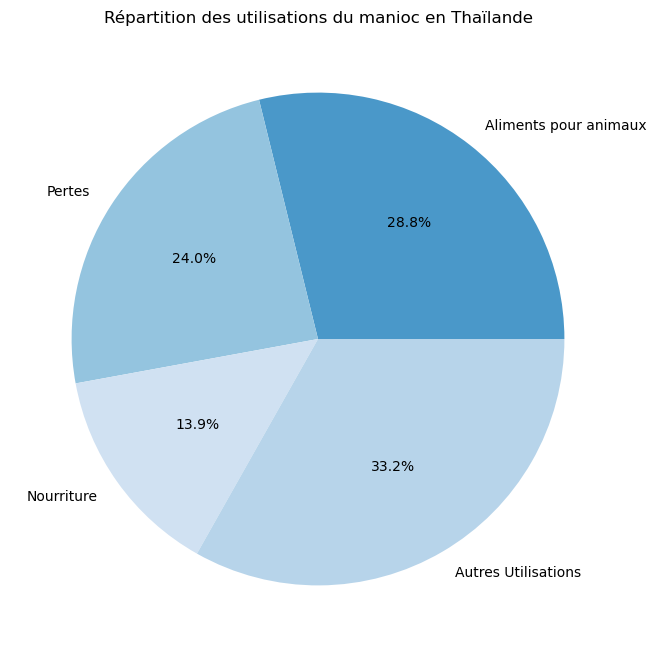

In [157]:
# Données à afficher
valeurs = [6.0, 5.0, 2.9, 6.9]
etiquettes = ["Aliments pour animaux", "Pertes", "Nourriture", "Autres Utilisations"]
couleurs = plt.cm.Blues([0.6, 0.4, 0.2, 0.3, 0.9, 0.7])

# Création du camembert
fig, ax = plt.subplots()
ax.pie(valeurs, labels=etiquettes, autopct='%1.1f%%', startangle=0, colors=couleurs)

# Ajout d'un titre
plt.title("Répartition des utilisations du manioc en Thaïlande")

# Agrandir la figure
plt.gcf().set_size_inches(8, 8)

# Affichage du camembert
plt.show()



In [158]:
# Calories par kg de manioc (source FAO)
kcal_manioc = 1090

# part annuelle de manioc exportée en KG
manioc_kilo = 25214000000

# Calcul de la disponibilité calorique de la quantité de manioc exportée chaque année
apport_kcal_manioc = kcal_manioc * manioc_kilo

# Calcul du nombre de personne qui pourrait être nourrie chaque année si la quantité de manioc dédiée à l'exportation était utilisée pour nourrir la population
nbr_pers_nourrie_manioc = round((apport_kcal_manioc / 2250) / 365,0)

# Calcul du % de la population de Thaïlande que cela représente
proportion_population = round((33465157.0/69209810.0) * 100,1)

# Comparaison avec la population en sous nutrition

Comparaison = round((33465157.0/6200000.0),1)

# Comparaison avec la part utilisé pour nourrir les thailandais .

Comparaison2 = round((25214000000/871000000.0),1)


print("Chaque année, la Thaïlande exporte", manioc_kilo,"KG de manioc.\n")
print("Si cette part était utilisée pour nourrir sa population, la Thaïlande pourrait subvenir aux besoins alimentaire de", nbr_pers_nourrie_manioc, "individus annuellement.\n") 
print("Cela représente",proportion_population,"% de sa population totale.\n" )
print("Soit",Comparaison,"X la population en sous nutrition.\n")
print("Il y a",Comparaison2,"X plus de manioc exporté que de manioc pour nourrir la population thailandaise ")
                    

Chaque année, la Thaïlande exporte 25214000000 KG de manioc.

Si cette part était utilisée pour nourrir sa population, la Thaïlande pourrait subvenir aux besoins alimentaire de 33465157.0 individus annuellement.

Cela représente 48.4 % de sa population totale.

Soit 5.4 X la population en sous nutrition.

Il y a 28.9 X plus de manioc exporté que de manioc pour nourrir la population thailandaise 


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [160]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"